# Práctica # 1

##### Statistical Learning II
##### Gustavo Alvarado
##### Carnet # 20063401 

In [236]:
import numpy as np
import pandas as pd
import io
import math
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [199]:
# Importing data from Excel

from google.colab import files
uploaded = files.upload()

Saving estaturas.xlsx to estaturas (1).xlsx


In [201]:
df = pd.read_excel(io.BytesIO(uploaded['estaturas.xlsx']))
df




,Estatura(metros),Edad(años)
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,34.0
4,1.65,32.0
5,1.66,29.0
6,1.64,27.0
7,1.85,34.0
8,1.85,26.0
9,1.75,21.0


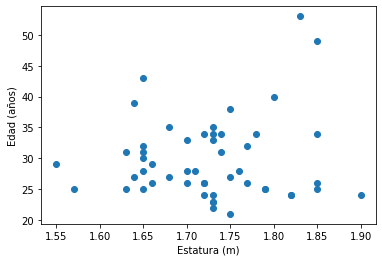

In [210]:
# Plotting data

x1 = df['Estatura(metros)']
x2 = df['Edad(años)'] 

plt.scatter(x1, x2)
plt.xlabel('Estatura (m)')
plt.ylabel('Edad (años)')
plt.show()

## Hard-clustering con k-means

In [211]:
# Initializing centroids using the plot

centroids = np.array([(1.60, 26), (1.68, 32), (1.75, 30), (1.85, 35)])
centroids

array([[ 1.6 , 26.  ],
       [ 1.68, 32.  ],
       [ 1.75, 30.  ],
       [ 1.85, 35.  ]])

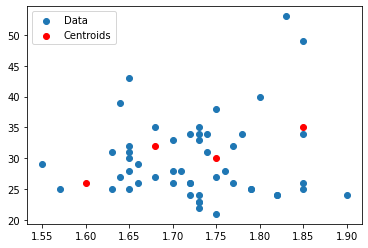

In [212]:
# Plotting data with initial centroids

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x1, x2, label = 'Data')
ax.scatter(centroids[:,0], centroids[:,1], label = 'Centroids', c = 'r')
plt.legend(loc='upper left')
plt.show()

In [213]:
# K-means function

def kMeans(data, k, centroids, EPOCHS):
  
  for e in range(EPOCHS):
    clusters = []
    # Defining clusters
    for d in data:
      minDistance = float('inf')
      cluster = -1
      i = 0
      for c in centroids:
        # Obtaning euclidean distance between data and centroid
        newDistance = math.sqrt((d[0] - c[0]) ** 2 + (d[1] - c[1]) ** 2)
        if minDistance > newDistance:
          minDistance = newDistance
          cluster = i
        i+=1
      clusters.append(cluster)

    #Updating centroids with the average for each cluster
    newCentroids = []
    counter = []
    for c in centroids:
      newCentroids.append([0, 0])
      counter.append(0)

    j = 0

    for d in data:
      # Summarizing by cluster and counting
      newCentroids[clusters[j]] += d
      counter[clusters[j]] += 1
        
      j += 1;

    k = 0
    for nc in newCentroids:
      # Calculating average
      newCentroids[k] = (nc[0] / counter[k], nc[1] / counter[k]) 
      k += 1
    
    centroids = newCentroids
    print('Centroids after epoch ', e + 1, ': ', centroids)    


  return clusters 



In [214]:
clusters = kMeans(df.values, 4, centroids, 10)

Centroids after epoch  1 :  [(1.7339999999999998, 24.96), (1.6883333333333335, 32.0), (1.6814285714285713, 29.0), (1.75, 38.61538461538461)]
Centroids after epoch  2 :  [(1.7442857142857144, 24.523809523809526), (1.7214285714285713, 33.07142857142857), (1.675, 28.1), (1.7533333333333332, 43.666666666666664)]
Centroids after epoch  3 :  [(1.7442857142857144, 24.523809523809526), (1.7233333333333332, 33.4), (1.675, 28.1), (1.754, 44.8)]
Centroids after epoch  4 :  [(1.7442857142857144, 24.523809523809526), (1.718125, 33.75), (1.675, 28.1), (1.7824999999999998, 46.25)]
Centroids after epoch  5 :  [(1.7442857142857144, 24.523809523809526), (1.718125, 33.75), (1.675, 28.1), (1.7824999999999998, 46.25)]
Centroids after epoch  6 :  [(1.7442857142857144, 24.523809523809526), (1.718125, 33.75), (1.675, 28.1), (1.7824999999999998, 46.25)]
Centroids after epoch  7 :  [(1.7442857142857144, 24.523809523809526), (1.718125, 33.75), (1.675, 28.1), (1.7824999999999998, 46.25)]
Centroids after epoch  8 

## Experimentando para definir k

In [218]:
# Function to plotter experiment results

def plottingExperiment(x1, x2, centroids, clusters):
  #data.insert(column='Cluster', value = clusters, loc = 2)
  plt.scatter(x1, x2, c = clusters)
  plt.xlabel('Edad (años)')
  plt.ylabel('Estatura (m)')
  plt.show()
  return 

### Experimento 1 / k = 4

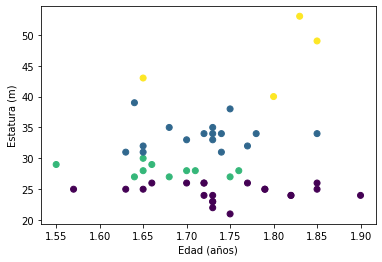

In [219]:
plottingExperiment(x1, x2, centroids, clusters)

### Experimento 2 / k = 3

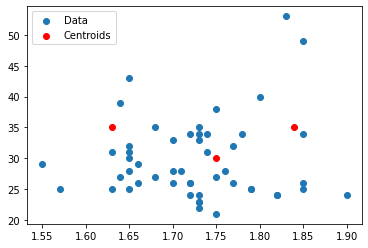

In [223]:
centroids2 = np.array([(1.63, 35), (1.75, 30), (1.84, 35)])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x1, x2, label = 'Data')
ax.scatter(centroids2[:,0], centroids2[:,1], label = 'Centroids', c = 'r')
plt.legend(loc='upper left')
plt.show()


In [224]:
clusters2 = kMeans(df.values, 3, centroids2, 10)

Centroids after epoch  1 :  [(1.6975, 35.75), (1.7172222222222218, 26.47222222222222), (1.8, 40.285714285714285)]
Centroids after epoch  2 :  [(1.7358333333333331, 34.0), (1.7176470588235289, 26.147058823529413), (1.754, 44.8)]
Centroids after epoch  3 :  [(1.718125, 33.75), (1.7219354838709673, 25.677419354838708), (1.7824999999999998, 46.25)]
Centroids after epoch  4 :  [(1.7141176470588233, 33.529411764705884), (1.724333333333333, 25.533333333333335), (1.7824999999999998, 46.25)]
Centroids after epoch  5 :  [(1.7141176470588233, 33.529411764705884), (1.724333333333333, 25.533333333333335), (1.7824999999999998, 46.25)]
Centroids after epoch  6 :  [(1.7141176470588233, 33.529411764705884), (1.724333333333333, 25.533333333333335), (1.7824999999999998, 46.25)]
Centroids after epoch  7 :  [(1.7141176470588233, 33.529411764705884), (1.724333333333333, 25.533333333333335), (1.7824999999999998, 46.25)]
Centroids after epoch  8 :  [(1.7141176470588233, 33.529411764705884), (1.724333333333333

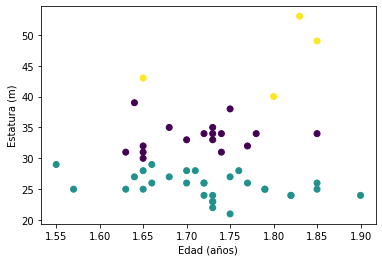

In [225]:
plottingExperiment(x1, x2, centroids2, clusters2)

### Experimento 3 / k = 6



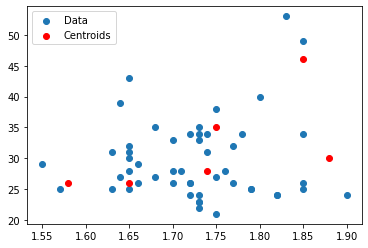

In [226]:
centroids3 = np.array([(1.58, 26), (1.65, 26), (1.74, 28), (1.75, 35), (1.85, 46), (1.88, 30)])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x1, x2, label = 'Data')
ax.scatter(centroids3[:,0], centroids3[:,1], label = 'Centroids', c = 'r')
plt.legend(loc='upper left')
plt.show()

In [227]:
clusters3 = kMeans(df.values, 6, centroids3, 10)

Centroids after epoch  1 :  [(1.57, 25.0), (1.7445454545454544, 24.727272727272727), (1.6828571428571426, 28.142857142857142), (1.7375, 35.25), (1.7766666666666666, 48.333333333333336), (1.6816666666666669, 31.166666666666668)]
Centroids after epoch  2 :  [(1.7249999999999999, 25.5), (1.7700000000000002, 23.22222222222222), (1.6777777777777776, 27.88888888888889), (1.7419999999999998, 35.7), (1.7766666666666666, 48.333333333333336), (1.6900000000000002, 31.625)]
Centroids after epoch  3 :  [(1.7249999999999999, 25.5), (1.7700000000000002, 23.22222222222222), (1.6777777777777776, 27.88888888888889), (1.7419999999999998, 35.7), (1.7766666666666666, 48.333333333333336), (1.6900000000000002, 31.625)]
Centroids after epoch  4 :  [(1.7249999999999999, 25.5), (1.7700000000000002, 23.22222222222222), (1.6777777777777776, 27.88888888888889), (1.7419999999999998, 35.7), (1.7766666666666666, 48.333333333333336), (1.6900000000000002, 31.625)]
Centroids after epoch  5 :  [(1.7249999999999999, 25.5)

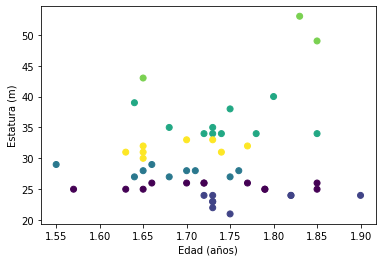

In [229]:
plottingExperiment(x1, x2, centroids3, clusters3)

## Análisis de resultados

Como se puede observar en los 3 experimientos anteriores, independientemente el valor de k seleccionado, al utilizar k-means, los clusters definidos siempre tienden a agruparse en relación a la edad y no a la relación edad / estatura, por lo que se puede concluír que no es posible definir una categoría a cada cluster que combine ambas variables. 

## Soft clustering con GMM

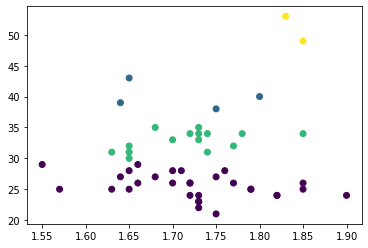

In [233]:
gmm = GaussianMixture(n_components = 4).fit(df.values)
labels = gmm.predict(df.values)
plt.scatter(df.values[:, 0], df.values[:, 1], c = labels)

In [235]:
probabilities = gmm.predict_proba(df.values)
print(probabilities[:5].round(3))

[[1.    0.    0.    0.   ]
 [0.05  0.    0.95  0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.003 0.997 0.   ]
 [0.015 0.    0.985 0.   ]]


# Estimación de valores (test)

In [237]:
uploaded = files.upload()

Saving estaturas_test.xlsx to estaturas_test.xlsx


In [238]:
df_test = pd.read_excel(io.BytesIO(uploaded['estaturas_test.xlsx']))
df_test

,Estatura(metros),Edad(años)
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30
5,1.76,32
6,1.79,31
7,1.61,31


In [240]:
probabilities_test = gmm.predict_proba(df_test.values)
print(probabilities_test[:5].round(3))

[[1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.184 0.    0.816 0.   ]
 [0.008 0.048 0.944 0.   ]
 [0.852 0.    0.148 0.   ]]


# GMM como función y simulación Monte Carlo

In [248]:
# f(x) = estatura / edad

def f(X):
  x1 = X[:,0]
  x2 = X[:,1]
  return x1/x2

In [249]:
muestra,cluster = gmm.sample(1000)

muestra_f = f(muestra)
valor_esperado_f = np.mean(muestra_f)

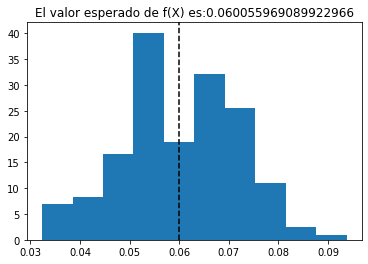

In [251]:
plt.hist(muestra_f, density=True)
plt.axvline(valor_esperado_f,color="k",linestyle="--")
plt.title("El valor esperado de f(X) es:{}".format(valor_esperado_f))

plt.show()

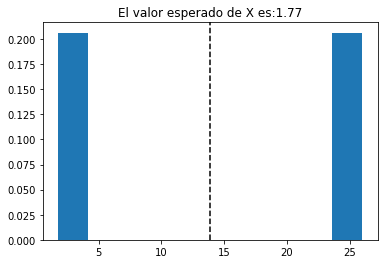

In [252]:
plt.hist(df.values[0], density=True)
plt.axvline(np.mean(df.values[0]),color="k",linestyle="--")
plt.title("El valor esperado de X es:{}".format(np.mean(df.values[0][0])))

plt.show()